In [5]:
using DelimitedFiles
data=readdlm(download("https://raw.githubusercontent.com/Dinesh-Adhithya-H/Julia-Scientific-programming/main/CCS.csv"),',')

121×6 Matrix{Any}:
    "PatientID"  "Cat1"  "Cat2"    "Var1"    "Var2"    "Var3"
   1             "A"     "C"     38.2568    5.93913  35.0579
   2             "A"     "C"     17.8317    5.34754  21.131
   8             "A"     "B"     16.0218    6.60709  60.9436
   9             "A"     "C"     45.1158    6.00733  21.8797
  16             "A"     "C"     20.448     8.54819  20.6623
  18             "A"     "B"     28.3549    7.95642  33.1807
  25             "A"     "C"     22.4497    6.34618  40.2365
  28             "A"     "B"     48.4125    5.32583  28.8956
  29             "A"     "C"     40.0075   11.4189   71.5911
  33             "A"     "C"     20.7181    5.37768  27.4216
  37             "A"     "B"     17.0396    5.34168  24.3501
  38             "A"     "B"     42.6687    5.82284  52.361
   ⋮                                                  ⋮
  76             "B"     "R"     17.0029    5.39477  31.1297
  78             "B"     "L"     55.3879    4.15304  40.0846
  80       

In [17]:
import Pkg
Pkg.add("StatsBase")
Pkg.add("CSV")
Pkg.add("PyPlot")
Pkg.add("Distributions")
Pkg.add("HypothesisTests")
Pkg.add("StatsPlots")
Pkg.add("GLM")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.6/Project.toml`
  No Changes to `~/.julia/environments/v1.6/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.6/Project.toml`
  No Changes to `~/.julia/environments/v1.6/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.6/Project.toml`
  No Changes to `~/.julia/environments/v1.6/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.6/Project.toml`
  No Changes to `~/.julia/environments/v1.6/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.6/Project.toml`
  No Changes to `~/.julia/environments/v1.6/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.6/Project.toml`
  No Changes to `~/.julia/environments/v1.6/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.6/Project.toml`
  No Chan

In [21]:
using Distributions
using StatsBase
using CSV
using DataFrames
#using HypothesisTests
#using StatsPlots
#using GLM

In [34]:
age=rand(18:80,100)
wcc=round.(rand(Distributions.Normal(12,2),100))
crp=round.(Int,rand(Distributions.Chisq(4),100))
treatment=rand(["A","B"],100)
result=rand(["improved","static","worse"],100);

In [29]:
var(wcc)

3.507474747474748

In [30]:
StatsBase.describe(age)

Summary Stats:
Length:         100
Missing Count:  0
Mean:           51.510000
Minimum:        18.000000
1st Quartile:   38.750000
Median:         53.000000
3rd Quartile:   65.250000
Maximum:        80.000000
Type:           Int64


In [32]:
StatsBase.summarystats(wcc)

Summary Stats:
Length:         100
Missing Count:  0
Mean:           11.740000
Minimum:        7.000000
1st Quartile:   10.000000
Median:         12.000000
3rd Quartile:   13.000000
Maximum:        16.000000


In [33]:
data=DataFrame(Age=age,WCC=wcc,CRP=crp,Treatment=treatment,Result=result)

,Age,WCC,CRP,Treatment,Result
,Int64,Float64,Int64,String,String
1,55,14.0,15,B,improved
2,76,12.0,3,A,worse
3,56,11.0,2,A,static
4,70,10.0,1,A,worse
5,55,13.0,4,B,worse
6,39,11.0,4,A,worse
7,34,9.0,9,B,improved
8,63,8.0,2,A,improved
9,74,10.0,3,A,improved


In [35]:
size(data)

(100, 5)

In [36]:
first(data,6)

,Age,WCC,CRP,Treatment,Result
,Int64,Float64,Int64,String,String
1,55,14.0,15,B,improved
2,76,12.0,3,A,worse
3,56,11.0,2,A,static
4,70,10.0,1,A,worse
5,55,13.0,4,B,worse
6,39,11.0,4,A,worse


In [43]:
dataA=data[data[:,:Treatment].=="A",:]
dataB=data[data[:,:Treatment].=="B",:];

In [44]:
describe(data)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,Age,51.51,18,53.0,80,0,Int64
2,WCC,11.74,7.0,12.0,16.0,0,Float64
3,CRP,4.29,0,3.0,15,0,Int64
4,Treatment,,A,,B,0,String
5,Result,,improved,,worse,0,String


In [45]:
grouped_df=groupby(data,:Treatment)

,Age,WCC,CRP,Treatment,Result
,Int64,Float64,Int64,String,String
1,55,14.0,15,B,improved
2,55,13.0,4,B,worse
3,34,9.0,9,B,improved
4,38,12.0,1,B,static
5,34,12.0,2,B,worse
6,34,10.0,6,B,static
7,34,11.0,1,B,worse
8,33,9.0,1,B,improved
9,48,14.0,3,B,static


In [50]:
combine(size,grouped_df)

,Treatment,x1
,String,Tuple…
1,B,"(50, 5)"
2,A,"(50, 5)"


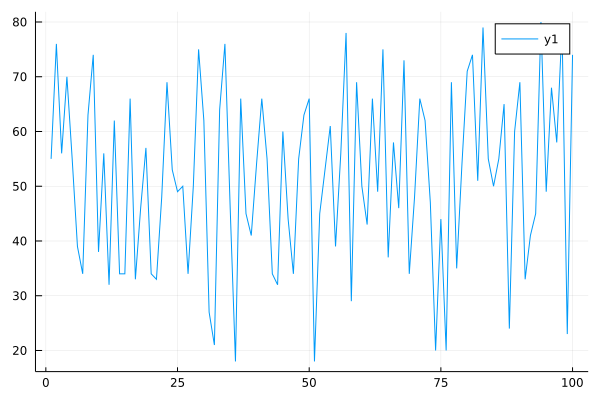

In [57]:
using Plots
plot(data[:,:Age])

In [58]:
?density

search: density density! DimensionMismatch DiscreteUnivariateDistribution



```
density(x)
density!(x)
```

Make a line plot of a kernel density estimate of x.

# Arguments

  * `x`: AbstractVector of samples for probability density estimation

# Example

```julia-repl
julia> using StatsPlots
julia> density(randn(100_000))
```


In [67]:
mean(randn(100))

0.008478339887886311

In [68]:
?TDist

search: TDist MvTDist DiscreteDistribution product_distribution



```
TDist(ν)
```

The *Students T distribution* with `ν` degrees of freedom has probability density function

$$
f(x; d) = \frac{1}{\sqrt{d} B(1/2, d/2)}
\left( 1 + \frac{x^2}{d} \right)^{-\frac{d + 1}{2}}
$$

```julia
TDist(d)      # t-distribution with d degrees of freedom

params(d)     # Get the parameters, i.e. (d,)
dof(d)        # Get the degrees of freedom, i.e. d
```

External links

[Student's T distribution on Wikipedia](https://en.wikipedia.org/wiki/Student%27s_t-distribution)


In [73]:
?DataFrames

search: DataFrames DataFrame DataFrameRow SubDataFrame GroupedDataFrame



No documentation found.

No docstring found for module `DataFrames`.


In [74]:
?view

search: view @view @views DivideError vline! vline deviance VariateForm VonMises



```
view(A, inds...)
```

Like [`getindex`](@ref), but returns a lightweight array that lazily references (or is effectively a *view* into) the parent array `A` at the given index or indices `inds` instead of eagerly extracting elements or constructing a copied subset. Calling [`getindex`](@ref) or [`setindex!`](@ref) on the returned value (often a [`SubArray`](@ref)) computes the indices to access or modify the parent array on the fly.  The behavior is undefined if the shape of the parent array is changed after `view` is called because there is no bound check for the parent array; e.g., it may cause a segmentation fault.

Some immutable parent arrays (like ranges) may choose to simply recompute a new array in some circumstances instead of returning a `SubArray` if doing so is efficient and provides compatible semantics.

!!! compat "Julia 1.6"
    In Julia 1.6 or later, `view` can be called on an `AbstractString`, returning a `SubString`.


# Examples

```jldoctest
julia> A = [1 2; 3 4]
2×2 Matrix{Int64}:
 1  2
 3  4

julia> b = view(A, :, 1)
2-element view(::Matrix{Int64}, :, 1) with eltype Int64:
 1
 3

julia> fill!(b, 0)
2-element view(::Matrix{Int64}, :, 1) with eltype Int64:
 0
 0

julia> A # Note A has changed even though we modified b
2×2 Matrix{Int64}:
 0  2
 0  4

julia> view(2:5, 2:3) # returns a range as type is immutable
3:4
```


In [78]:
? CSV

search: CSV crosscov crosscov! ContinuousUnivariateDistribution



No documentation found.

No docstring found for module `CSV`.
